In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)



**Read clean data**

In [2]:
clean = pd.read_csv("../data/clean1.csv")

In [3]:
clean.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length.1,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
clean.describe()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length.1,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06
mean,8.061534e+03,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,5.825628e+01,6.897811e+01,8.717304e+02,4.108922e+01,3.062575e+02,3.356657e+02,1.491719e+06,7.085423e+04,1.299765e+06,2.922231e+06,9.191785e+06,1.625442e+05,1.449765e+07,2.612839e+06,3.270269e+06,9.052107e+06,1.022929e+06,9.903861e+06,1.807615e+06,1.487480e+06,4.689442e+06,9.682420e+05,4.639595e-02,0.0,1.113910e-04,0.0,-2.602379e+04,-2.275588e+03,6.393010e+04,7.002284e+03,1.644888e+01,9.513591e+02,1.721137e+02,2.952720e+02,4.866468e+05,3.528266e-02,4.639595e-02,2.425849e-04,2.982836e-01,3.153147e-01,9.482948e-02,1.113910e-04,2.436458e-04,6.838443e-01,1.921707e+02,5.825628e+01,3.062575e+02,-2.602379e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.368972e+00,5.498417e+02,1.040396e+01,1.617869e+04,6.992389e+03,1.988290e+03,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8.324468e+06,5.043548e+05,8.704568e+06,7.928061e+06
std,1.827432e+04,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,1.861733e+02,2.813212e+02,1.947157e+03,6.888118e+01,6.054855e+02,8.400508e+02,2.594016e+07,2.544154e+05,4.510039e+06,8.049410e+06,2.447019e+07,2.951772e+06,3.358966e+07,9.530187e+06,9.643379e+06,2.453990e+07,8.595729e+06,2.874945e+07,8.891515e+06,6.281472e+06,1.716900e+07,8.313137e+06,2.103411e-01,0.0,1.055361e-02,0.0,2.106353e+07,1.452945e+06,2.476542e+05,3.817038e+04,2.524615e+01,2.029034e+03,3.055985e+02,6.320510e+02,1.648252e+06,1.844934e-01,2.103411e-01,1.557325e-02,4.575047e-01,4.646412e-01,2.929793e-01,1.055361e-02,1.560726e-02,6.805824e-01,3.319734e+02,1.861733e+02,6.054855e+02,2.106353e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.500527e+

/work1/anaconda3/envs/upgrad_3812/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='destination_port'>

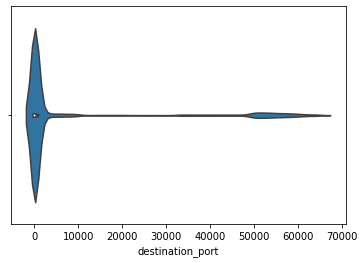

In [5]:
sns.violinplot(clean['destination_port'])

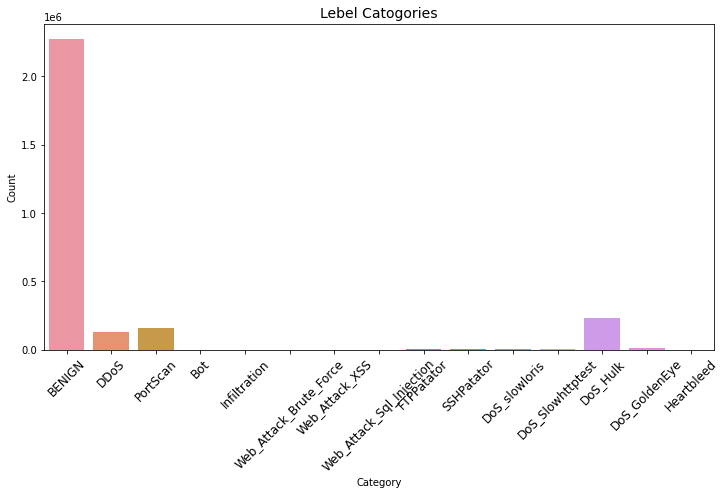

In [19]:
plt.figure(figsize=(12, 6))
plt.title("Lebel Catogories",fontsize=14)
sns.countplot(x="label", data=clean)
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45,fontsize=12)
plt.show()

In [7]:
clean['destination_port'].nunique()

53791

In [8]:
clean['label'].nunique()

15

In [9]:
clean['label'].value_counts()

BENIGN                      2271320
DoS_Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS_GoldenEye                 10293
FTPPatator                     7935
SSHPatator                     5897
DoS_slowloris                  5796
DoS_Slowhttptest               5499
Bot                            1956
Web_Attack_Brute_Force         1507
Web_Attack_XSS                  652
Infiltration                     36
Web_Attack_Sql_Injection         21
Heartbleed                       11
Name: label, dtype: int64

/work1/anaconda3/envs/upgrad_3812/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


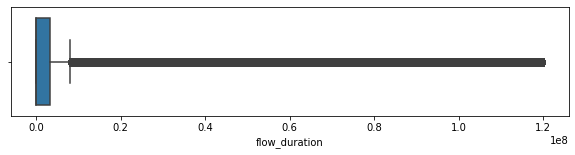

In [10]:
plt.figure(figsize=(10,2))
sns.boxplot(clean['flow_duration'])
plt.show()

In [11]:
first = clean[40:]

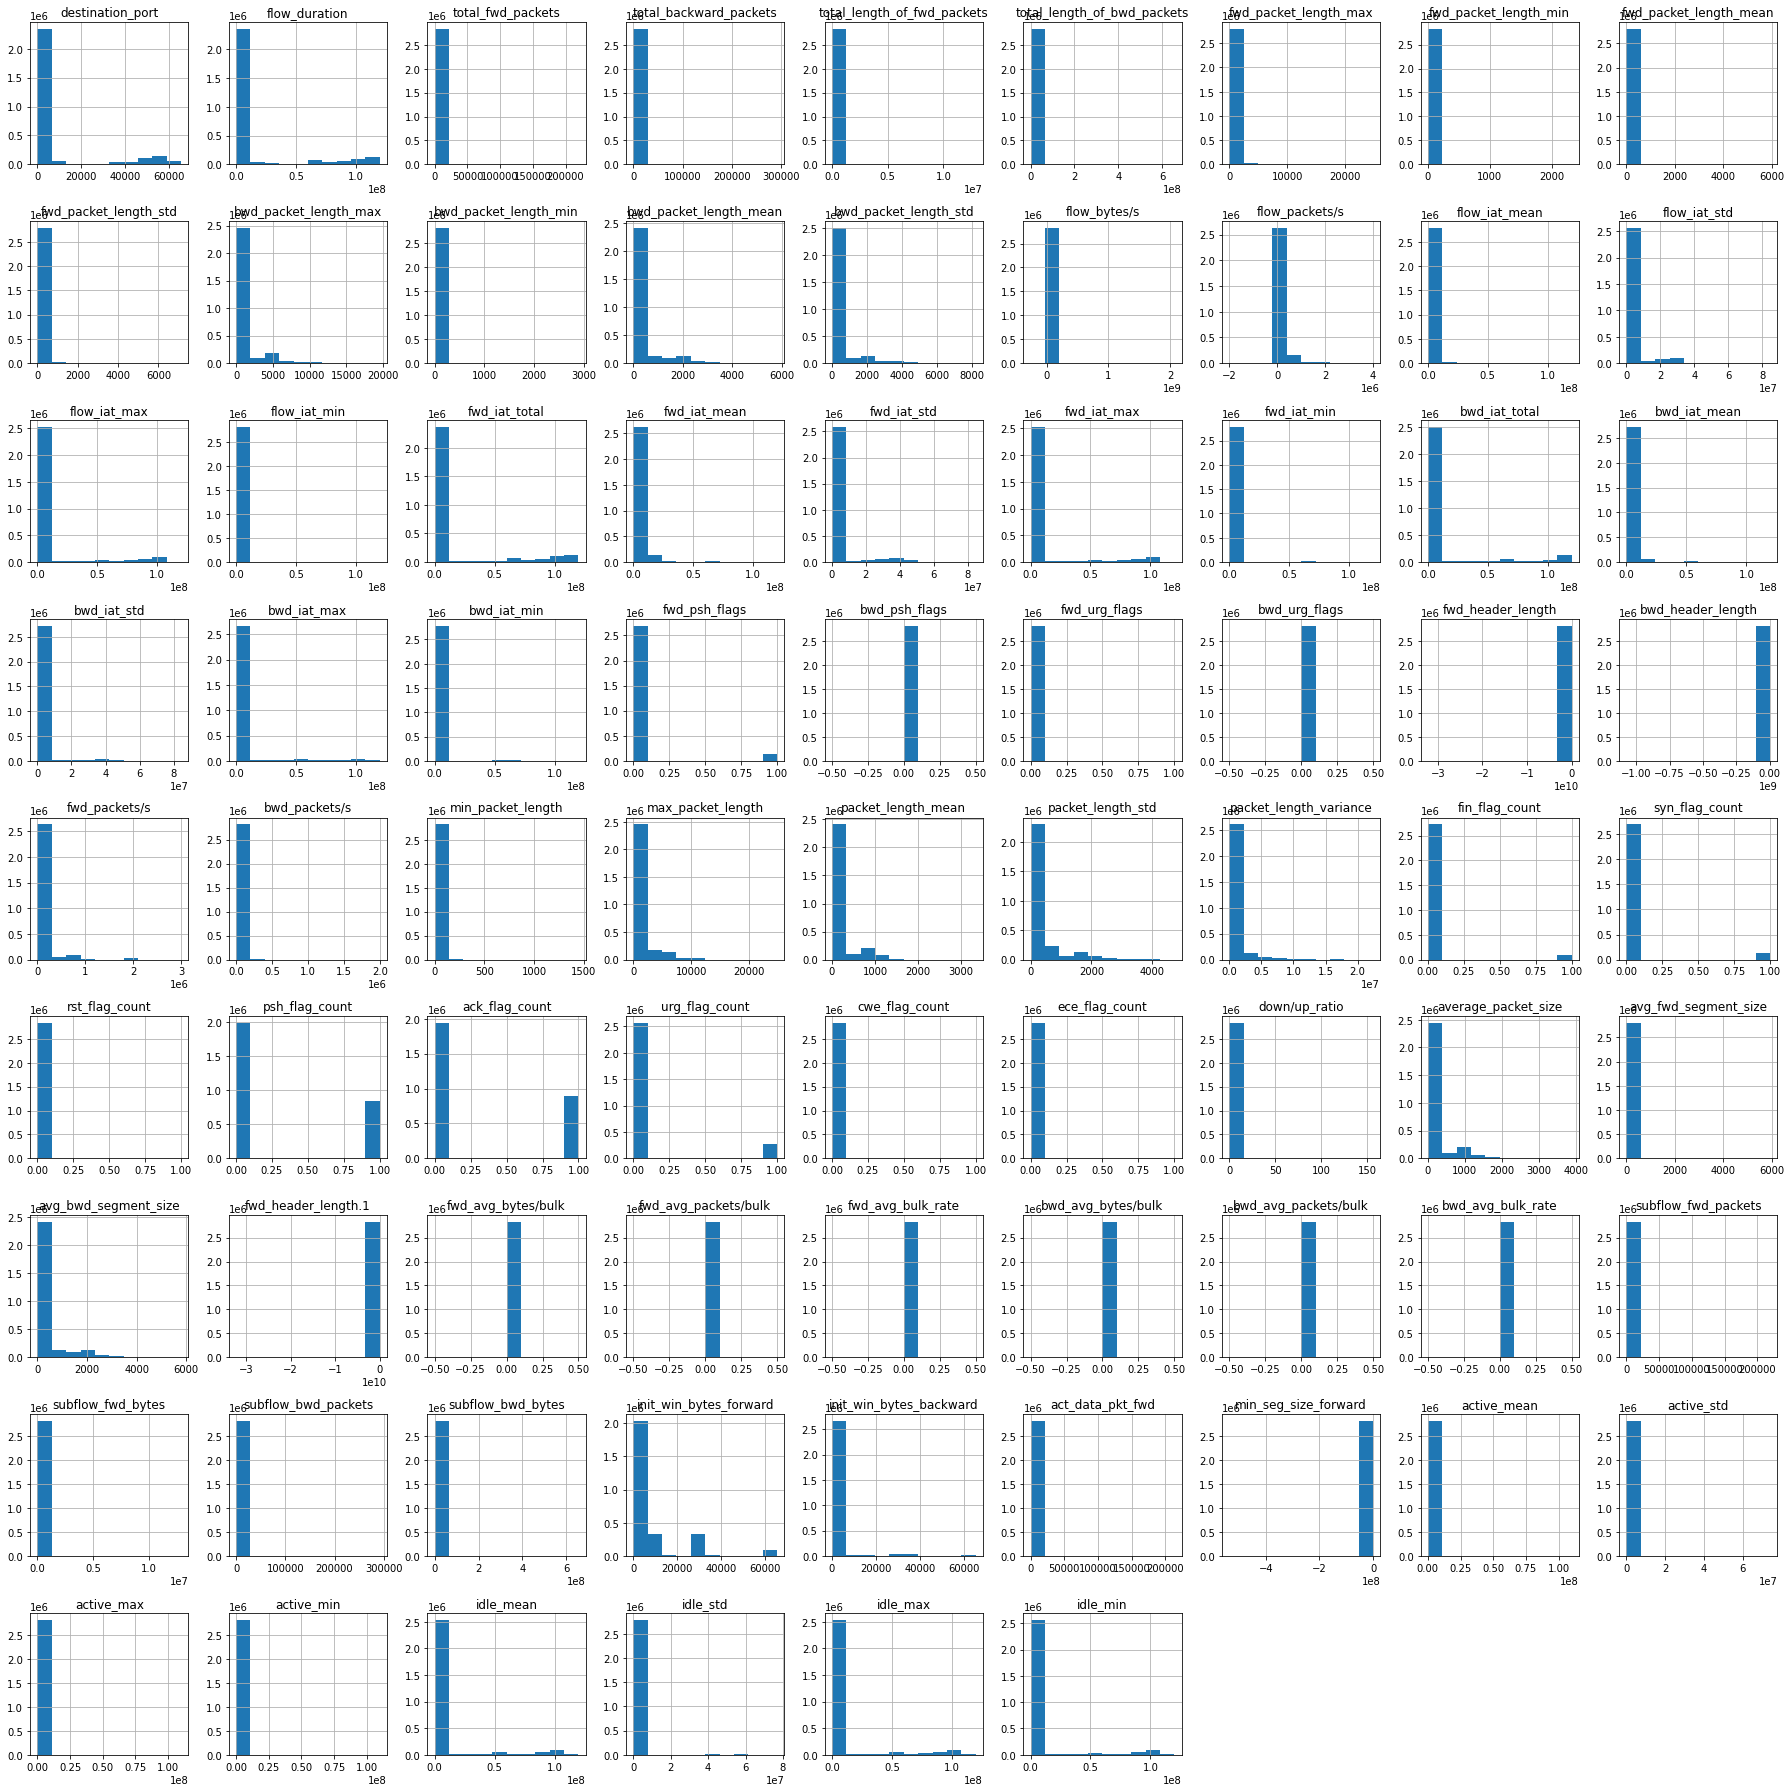

In [12]:
# Here we will plot histograms of the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

clean.replace([np.inf, -np.inf], np.nan, inplace=True)
clean.dropna()

clean.hist(figsize=(25, 25))
plt.tight_layout()
plt.show()

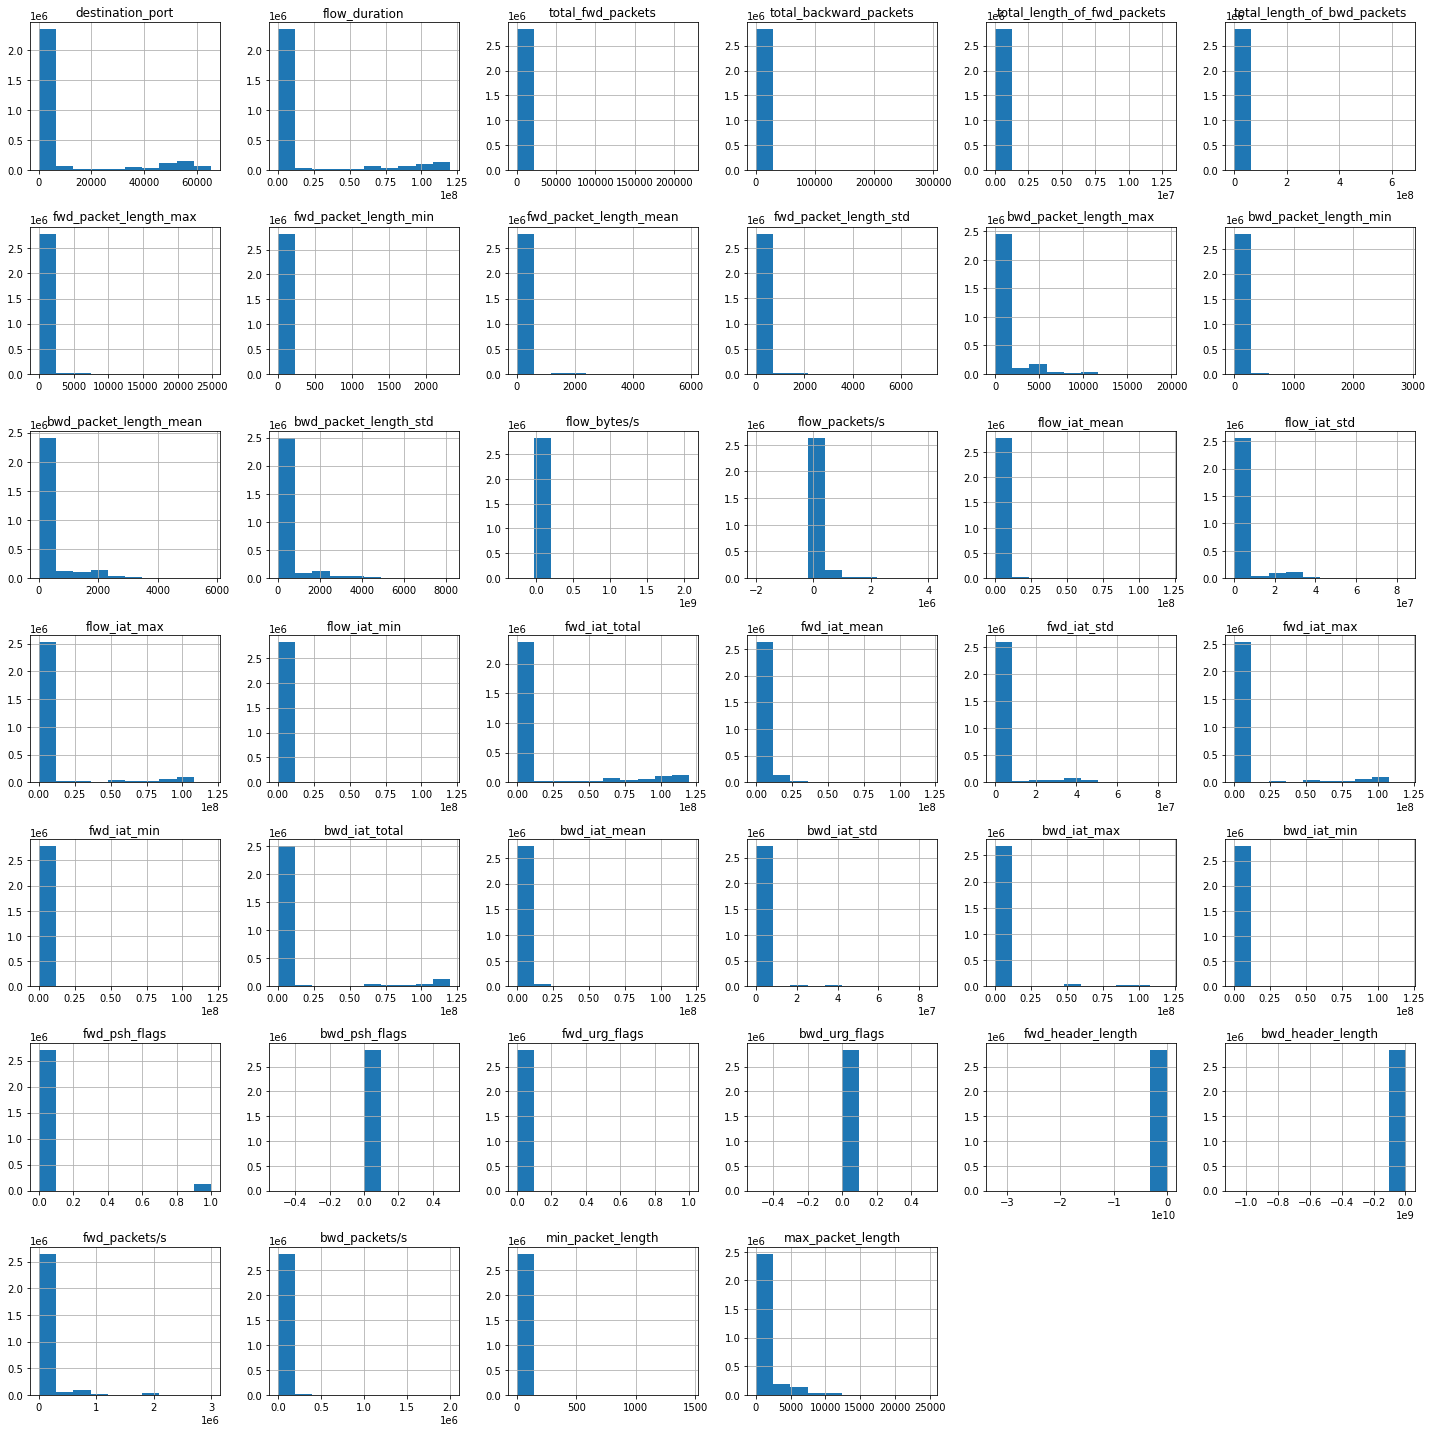

In [13]:
first_40_columns = clean.iloc[:, :40]
# Here we will plot histograms of the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

first_40_columns.replace([np.inf, -np.inf], np.nan, inplace=True)
first_40_columns.dropna()

first_40_columns.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

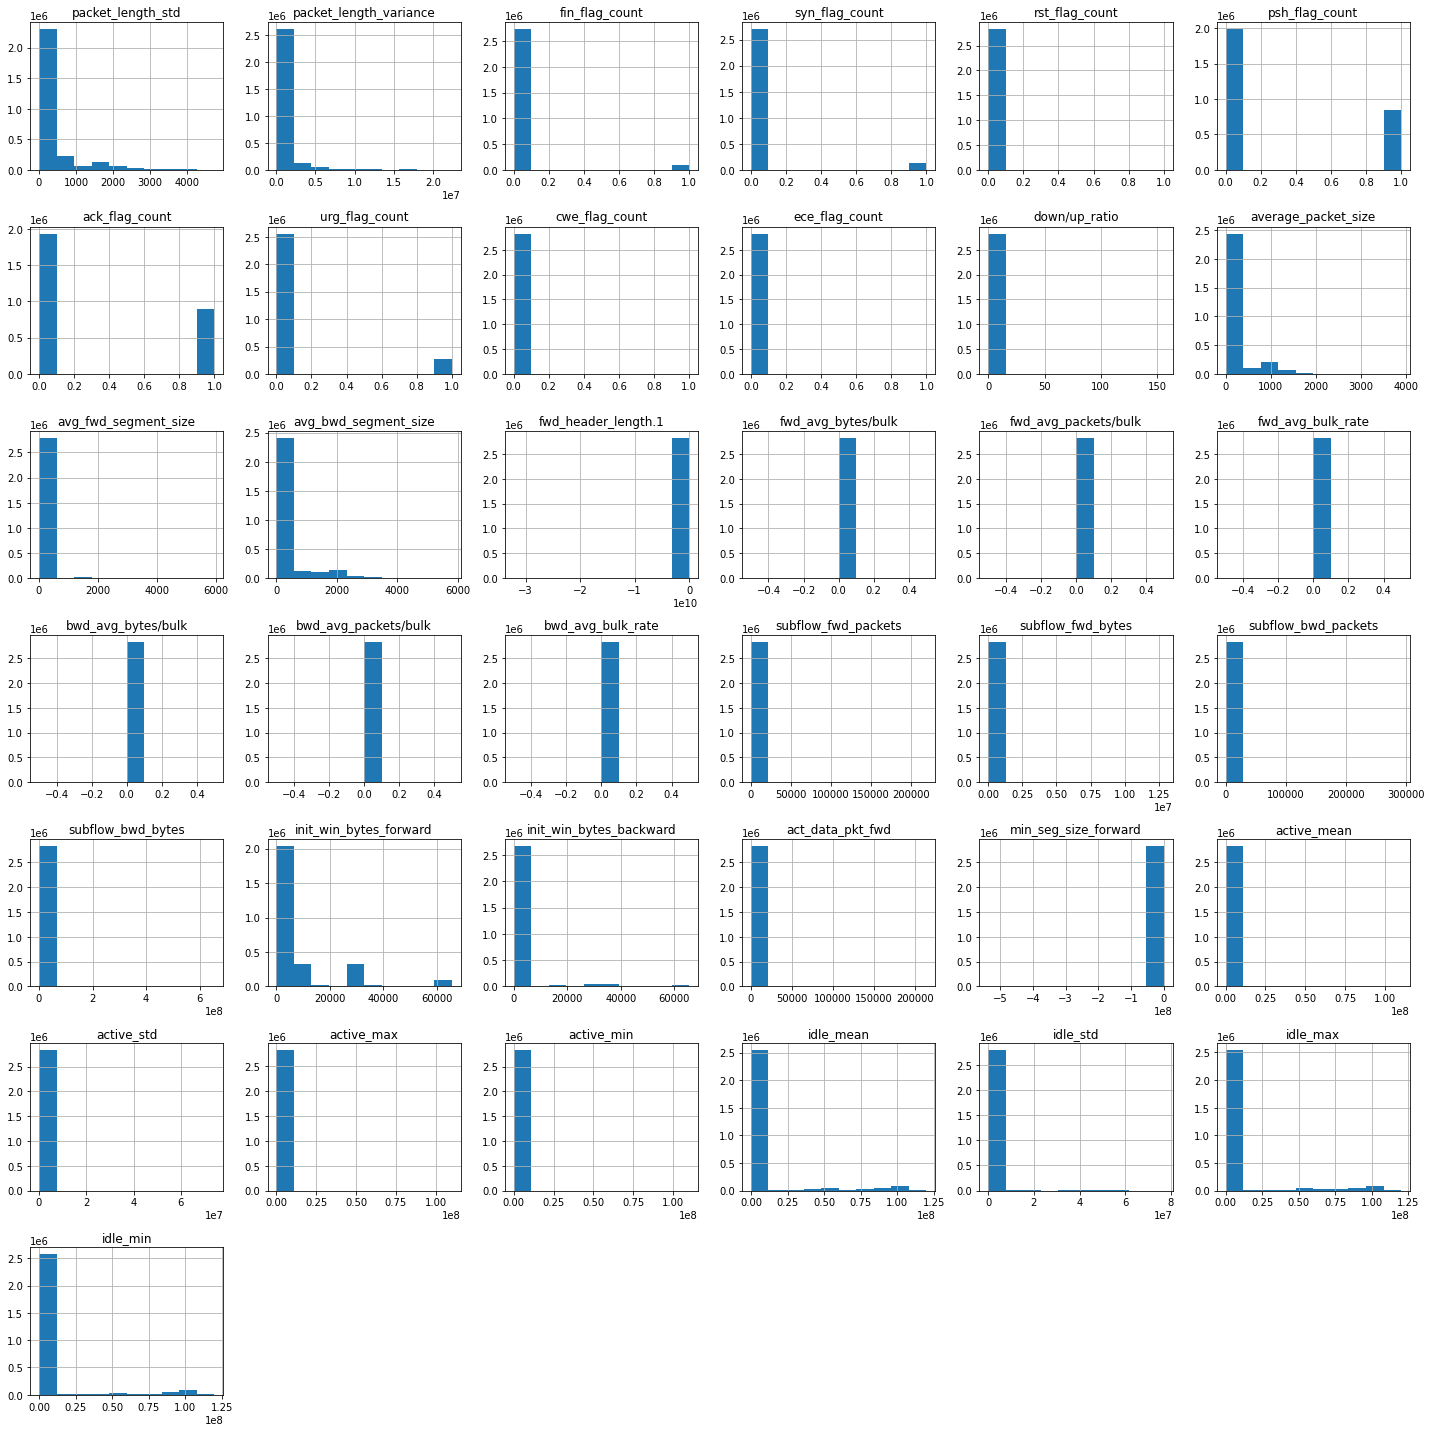

In [14]:
last_40_columns = clean.iloc[:, 41:]
# Here we will plot histograms of the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

last_40_columns.replace([np.inf, -np.inf], np.nan, inplace=True)
last_40_columns.dropna()

last_40_columns.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

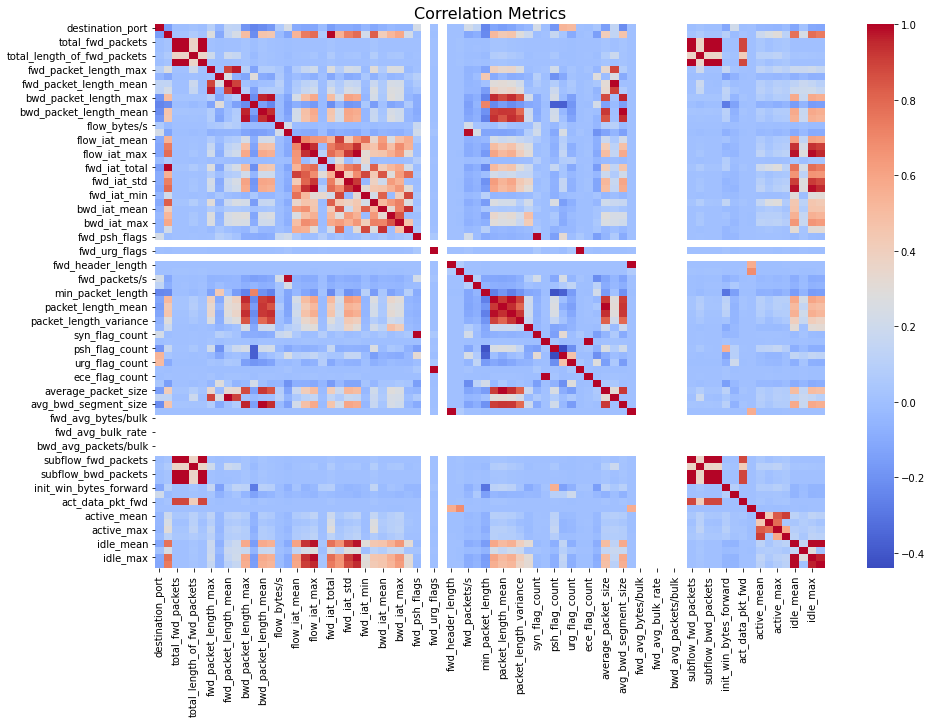

In [15]:
# Here we will plot the correlation matrix
correlation_matrix = clean.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Metrics',fontsize=16)
plt.show()

In [16]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  